<a href="https://colab.research.google.com/github/Luv3/luv3/blob/main/Trabalho_final_Projeto_Integrador_III_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Realizando a importação das bibliotecas

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
# Importanto os dados da tabela para realização do trabalho

doencas = pd.read_excel('/content/projetoIIIA.xlsx')

In [ ]:
# Verificando os 10 primeiros dados da tabela
doencas.head(10)

,Febre,Dificuldade de Respirar,Mal-estar,Dor de Garganta,Diagnostico
0,5.0,4.0,10.0,1.0,COVID
1,5.5,4.0,2.0,1.0,COVID
2,5.0,5.0,6.0,2.5,COVID
3,6.0,2.5,6.5,3.0,COVID
4,6.5,5.0,9.0,0.0,COVID
5,7.0,5.0,8.0,1.0,COVID
6,7.5,5.0,10.0,1.0,COVID
7,8.0,7.5,7.0,5.0,COVID
8,8.5,6.0,7.5,4.5,COVID
9,9.0,6.5,4.0,0.0,COVID


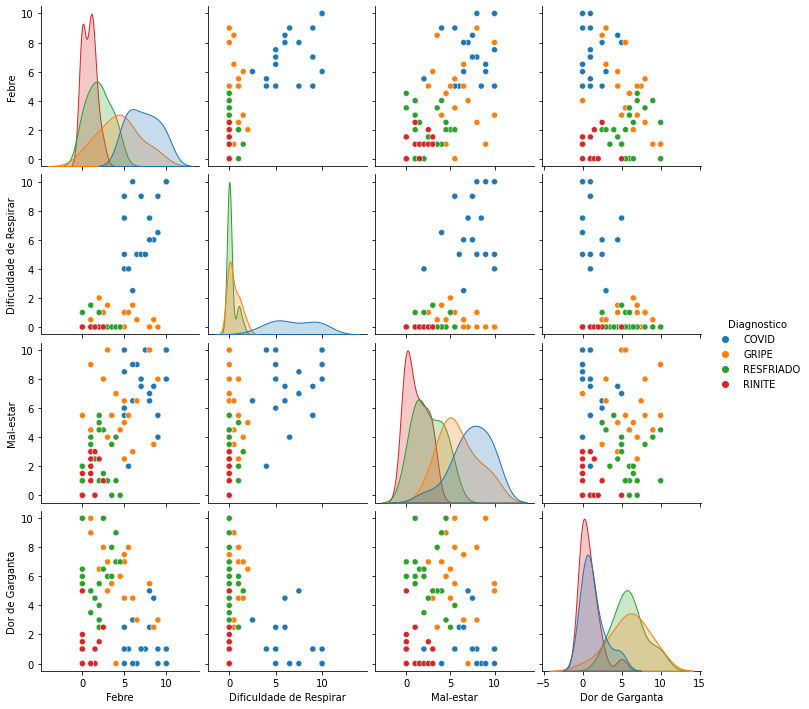

In [ ]:
# Mostrando a matriz de cores com base nos diagnosticos de Covid, Gripe, Resfriado e Rinite
# Mostrando a distribuição dos dados

sb.pairplot(doencas, hue='Diagnostico')

In [ ]:
# Criando uma variável para armazenar somente as características das doenças.
# doencas.drop('Diagnostico', axis=1) está excluindo a coluna com os Diagnósticos

X = np.array(doencas.drop('Diagnostico', axis=1))
X

array([[ 5. ,  4. , 10. ,  1. ],
       [ 5.5,  4. ,  2. ,  1. ],
       [ 5. ,  5. ,  6. ,  2.5],
       [ 6. ,  2.5,  6.5,  3. ],
       [ 6.5,  5. ,  9. ,  0. ],
       [ 7. ,  5. ,  8. ,  1. ],
       [ 7.5,  5. , 10. ,  1. ],
       [ 8. ,  7.5,  7. ,  5. ],
       [ 8.5,  6. ,  7.5,  4.5],
       [ 9. ,  6.5,  4. ,  0. ],
       [ 9. ,  9. ,  5.5,  1. ],
       [ 5. ,  7.5,  8.5,  0. ],
       [10. , 10. ,  8. ,  0. ],
       [10. , 10. , 10. ,  0. ],
       [10. , 10. , 10. ,  1. ],
       [ 8. ,  6. ,  6.5,  2.5],
       [ 6. , 10. ,  9. ,  0. ],
       [ 5. ,  9. ,  5.5,  1. ],
       [ 7. ,  9. ,  7.5,  1. ],
       [ 4. ,  0. ,  7. ,  0. ],
       [ 3. ,  0. , 10. ,  5. ],
       [ 3.5,  0. ,  5.5,  5.5],
       [ 4.5,  0. ,  4.5,  6. ],
       [ 5. ,  0. ,  6.5,  7.5],
       [ 5. ,  1. ,  2.5,  7. ],
       [ 2.5,  1. ,  8. ,  8. ],
       [ 1. ,  0.5,  4.5,  9. ],
       [ 0. ,  0. ,  5.5, 10. ],
       [ 1. ,  0. ,  9. , 10. ],
       [ 8. ,  0. , 10. ,  5.5],
       [ 9

In [ ]:
# Importando a biblioteca SkLearn para utilizar o KMeans

from sklearn.cluster import KMeans

In [ ]:
# Criando a variável que será o objeto utilizado
# Informando a quantidade de clusters (4), um para cada doença

kmeans = KMeans(n_clusters=4, random_state=0)

In [ ]:
# Realizando o treinamento do KMeans
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# Verificando os grupos
kmeans.labels_

array([3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
# Criando uma nova coluna de dados e inserindo os labels criados
doencas['K-Classes'] = kmeans.labels_

In [ ]:
# Verificando a tabela atualizada com a coluna K-Classes
doencas.head(10)

,Febre,Dificuldade de Respirar,Mal-estar,Dor de Garganta,Diagnostico,K-Classes
0,5.0,4.0,10.0,1.0,COVID,3
1,5.5,4.0,2.0,1.0,COVID,2
2,5.0,5.0,6.0,2.5,COVID,3
3,6.0,2.5,6.5,3.0,COVID,0
4,6.5,5.0,9.0,0.0,COVID,3
5,7.0,5.0,8.0,1.0,COVID,3
6,7.5,5.0,10.0,1.0,COVID,3
7,8.0,7.5,7.0,5.0,COVID,3
8,8.5,6.0,7.5,4.5,COVID,3
9,9.0,6.5,4.0,0.0,COVID,3


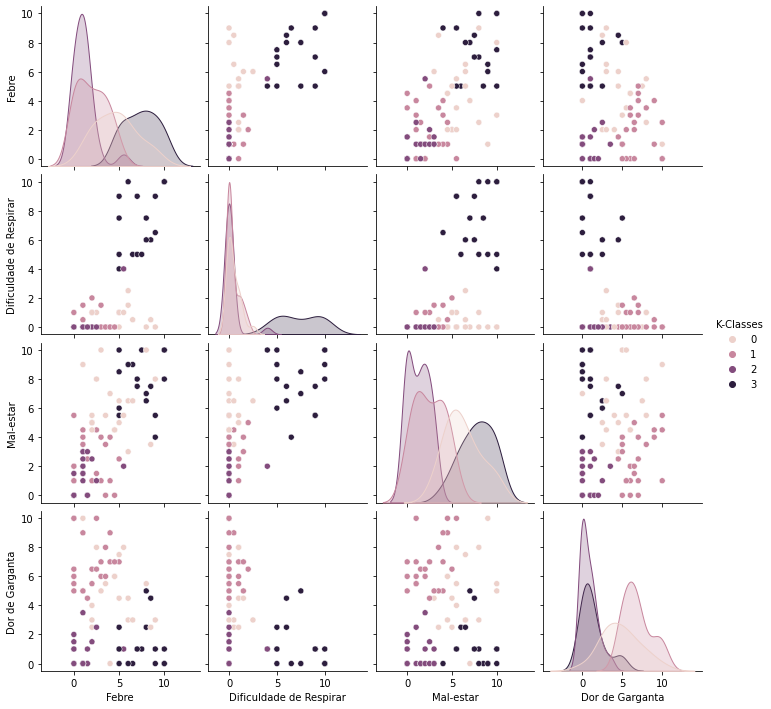

In [ ]:
# Criando a matriz com agrupamento K-Means
sb.color_palette("husl", 8)
sb.pairplot(doencas, hue='K-Classes')


In [ ]:
# Montando variavel para analisar a correlação

doencascorr = doencas.drop(['Diagnostico','K-Classes'], axis=1)
doencascorr.head(10)

,Febre,Dificuldade de Respirar,Mal-estar,Dor de Garganta
0,5.0,4.0,10.0,1.0
1,5.5,4.0,2.0,1.0
2,5.0,5.0,6.0,2.5
3,6.0,2.5,6.5,3.0
4,6.5,5.0,9.0,0.0
5,7.0,5.0,8.0,1.0
6,7.5,5.0,10.0,1.0
7,8.0,7.5,7.0,5.0
8,8.5,6.0,7.5,4.5
9,9.0,6.5,4.0,0.0


In [ ]:
# Matriz de correlação
corr_teste = doencascorr.corr()
corr_teste.corr()

,Febre,Dificuldade de Respirar,Mal-estar,Dor de Garganta
Febre,1.000000,0.907082,0.818206,-0.929486
Dificuldade de Respirar,0.907082,1.000000,0.761084,-0.998180
Mal-estar,0.818206,0.761084,1.000000,-0.788096
Dor de Garganta,-0.929486,-0.998180,-0.788096,1.000000


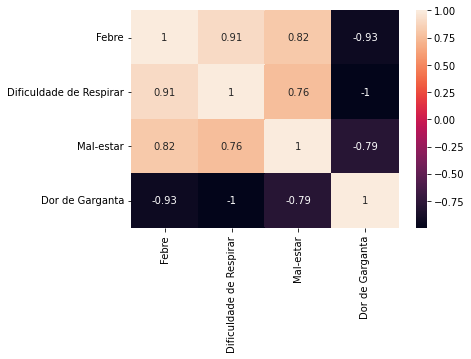

In [ ]:
sb.heatmap(corr_teste.corr(), annot=True)